# Valorant Project: Pro Data Correlation

<hr>

### Prereq Code

In [1]:
import pickle as pkl
import pandas as pd

with open("C:\\Users\\Binaryxx Sune\\Documents\\Programming\\personal_projects\\data\\pro_comp.pkl", "rb") as pro_comp_file:
    comp = pkl.load(pro_comp_file)

with open("C:\\Users\\Binaryxx Sune\\Documents\\Programming\\personal_projects\\data\\pro_map.pkl", "rb") as pro_map_file:
    val_map = pkl.load(pro_map_file)

with open("C:\\Users\\Binaryxx Sune\\Documents\\Programming\\personal_projects\\data\\pro_outcome.pkl", "rb") as pro_outcome_file:
    outcome = pkl.load(pro_outcome_file)


In [2]:
# Create a df
pro_df = pd.DataFrame({"comp": comp, "outcome": outcome, "val_map": val_map})

# Remove rows where there is no team comp captured
pro_df.dropna(subset = ["comp"], inplace = True)

In [3]:
# Remove the PICK at the end of the map name played on that some instances have
def remove_pick(val_map):
    if val_map[-4:] == "PICK":
        return val_map[:-4]
    else:
        return val_map

pro_df["val_map"] = pro_df["val_map"].apply(remove_pick)

In [4]:
# Convert win / lose to True / False
def outcome_convert(outcome):
    if outcome == "win":
        return True
    if outcome == "lose":
        return False

pro_df["outcome"] = pro_df["outcome"].apply(outcome_convert)
pro_df = pro_df.rename(columns = {"outcome": "win"})

In [5]:
pro_df

,comp,win,val_map
0,"[Raze, Astra, Kayo, Fade, Cypher]",False,Pearl
1,"[Fade, Astra, Raze, Breach, Killjoy]",True,Pearl
2,"[Jett, Breach, Sova, Killjoy, Astra]",False,Haven
3,"[Raze, Fade, Astra, Killjoy, Breach]",True,Haven
4,"[Jett, Astra, Killjoy, Kayo, Sova]",True,Ascent
...,...,...,...
527,"[Brimstone, Breach, Raze, Fade, Cypher]",False,Bind
528,"[Raze, Omen, Fade, Viper, Killjoy]",True,Haven
529,"[Breach, Jett, Sova, Omen, Killjoy]",False,Haven
530,"[Raze, Cypher, Brimstone, Breach, Fade]",True,Fracture


In [6]:
def has_astra(comp):
    if "Astra" in comp:
        return True
    else:
        return False

pro_df["astra"] = pro_df["comp"].apply(has_astra)

astra_df = pro_df.groupby(["astra","val_map"], as_index = False)["win"].sum()
astra_df["match"] = pro_df.groupby(["astra","val_map"], as_index = False)["win"].count()["win"]


In [7]:
import numpy as np

astra_df["win_rate"] = np.around(astra_df["win"] / astra_df["match"], decimals = 2)
astra_df

,astra,val_map,win,match,win_rate
0,False,Ascent,48,95,0.51
1,False,Bind,16,29,0.55
2,False,Breeze,14,28,0.50
3,False,Fracture,22,49,0.45
4,False,Haven,44,90,0.49
5,False,Icebox,41,82,0.50
6,False,Lotus,1,1,1.00
7,False,Pearl,2,5,0.40
8,True,Ascent,15,31,0.48
9,True,Bind,1,5,0.20


<hr>  
 
### Agent and Map Correlation

#### Prereq Code

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def give_astra_correlation(val_map):
    map_df = astra_df[astra_df["val_map"] == val_map.capitalize()]
    map_df["win_rate"].round(2)

    sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

    map_viz = sns.barplot(y = "match", x = "astra", hue = "win_rate", data = map_df, palette = "RdYlGn", dodge = False)

    plt.xlabel("Astra on Team")
    map_viz.tick_params(labelsize = 10)
    plt.ylabel("Match Count")
    plt.title("Agents' Performance on "+ val_map.capitalize())

    plt.show()

#### All Maps

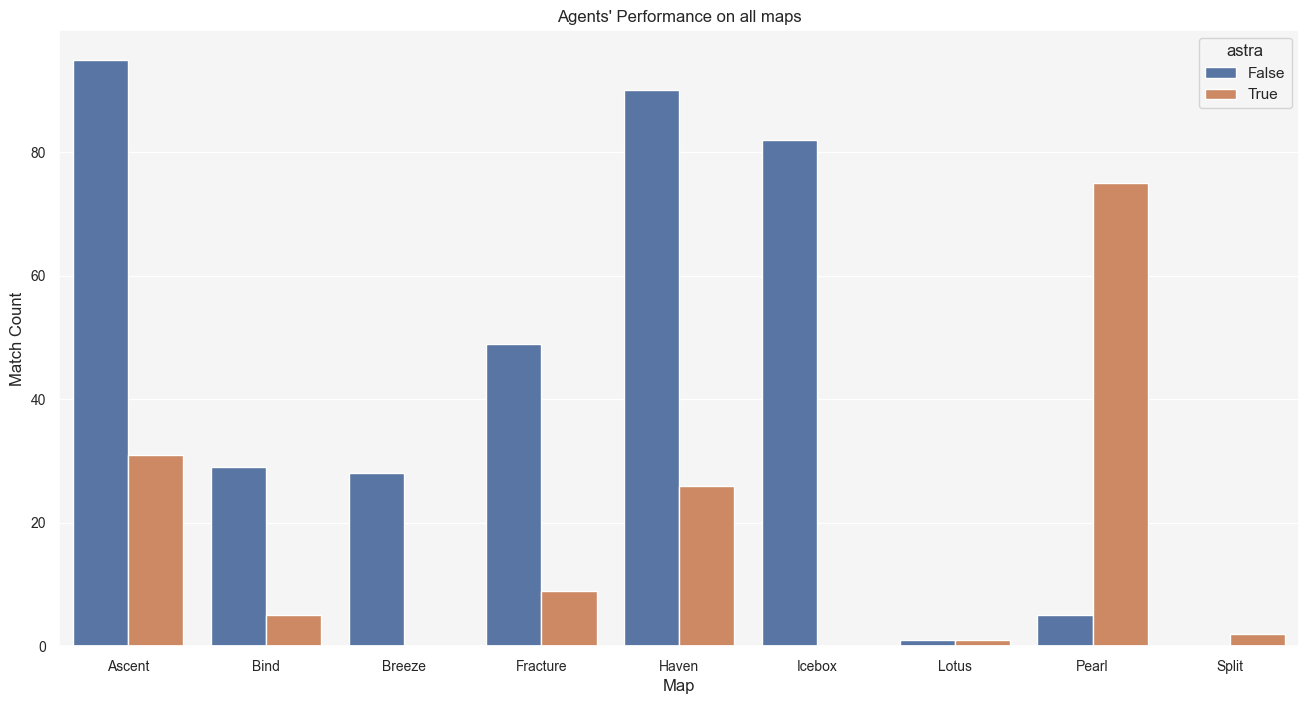

In [32]:
map_df = astra_df
map_df["win_rate"].round(2)

sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

map_viz = sns.barplot(y = "match", x = "val_map", hue = "astra", data = map_df)

plt.xlabel("Map")
map_viz.tick_params(labelsize = 10)
plt.ylabel("Match Count")
plt.title("Astra's' Performance on all maps")

plt.show()

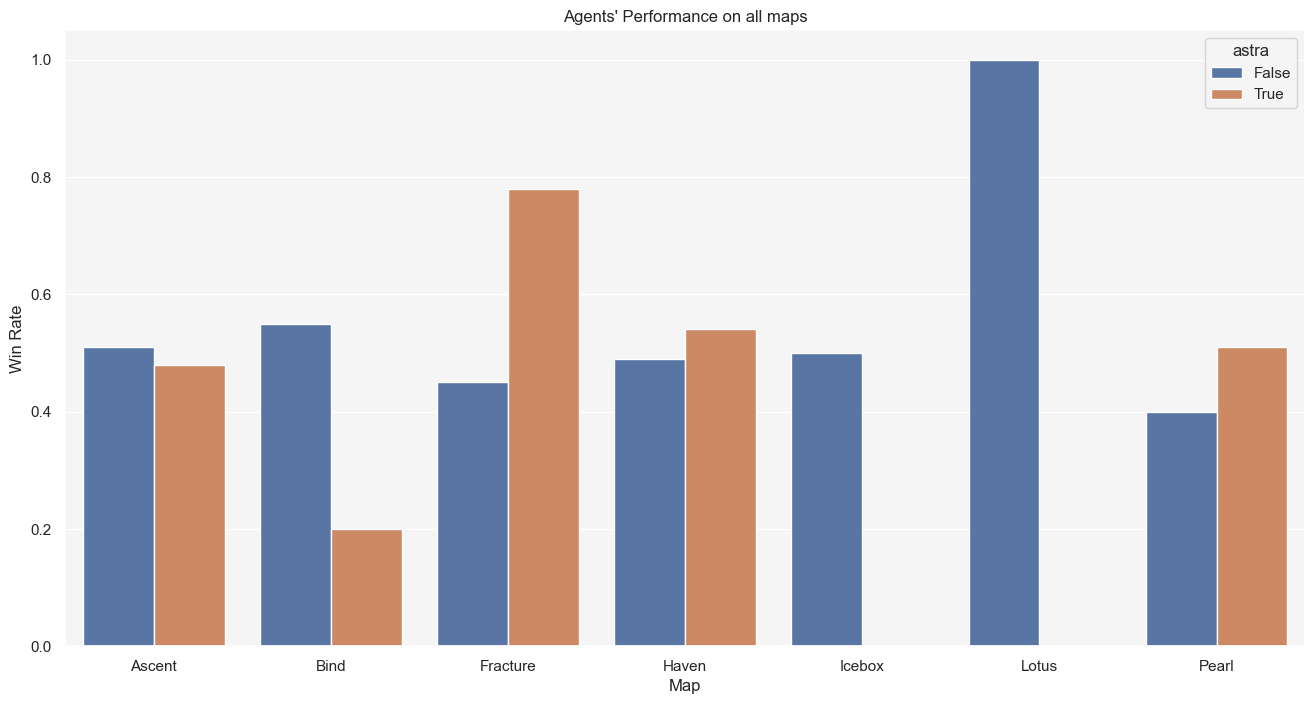

In [34]:
map_df = astra_df[~astra_df["val_map"].isin(["Split", "Breeze"])]
map_df["win_rate"].round(2)

sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

map_viz = sns.barplot(y = "win_rate", x = "val_map", hue = "astra", data = map_df)

plt.xlabel("Map")
plt.ylabel("Win Rate")
plt.title("Agents' Performance on all maps")

plt.show()

#### Ascent

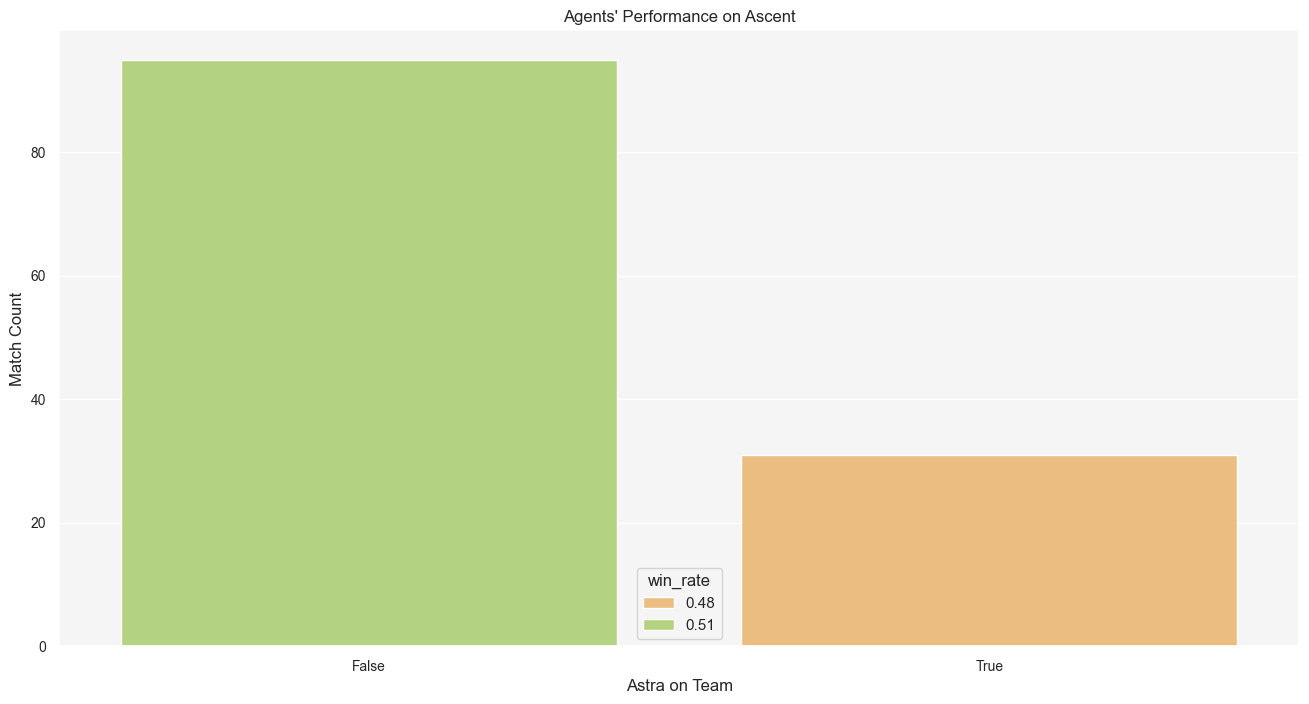

In [10]:
give_astra_correlation("ascent")

#### Fracture

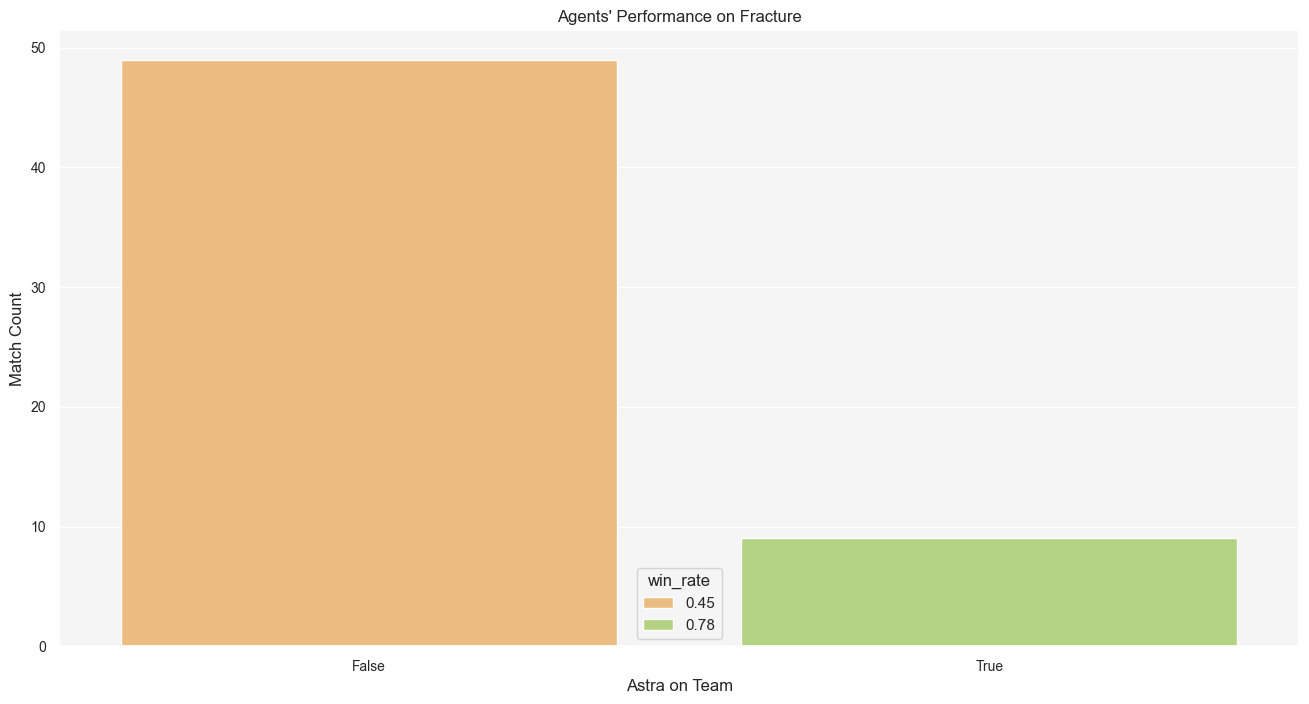

In [11]:
give_astra_correlation("fracture")

#### Lotus

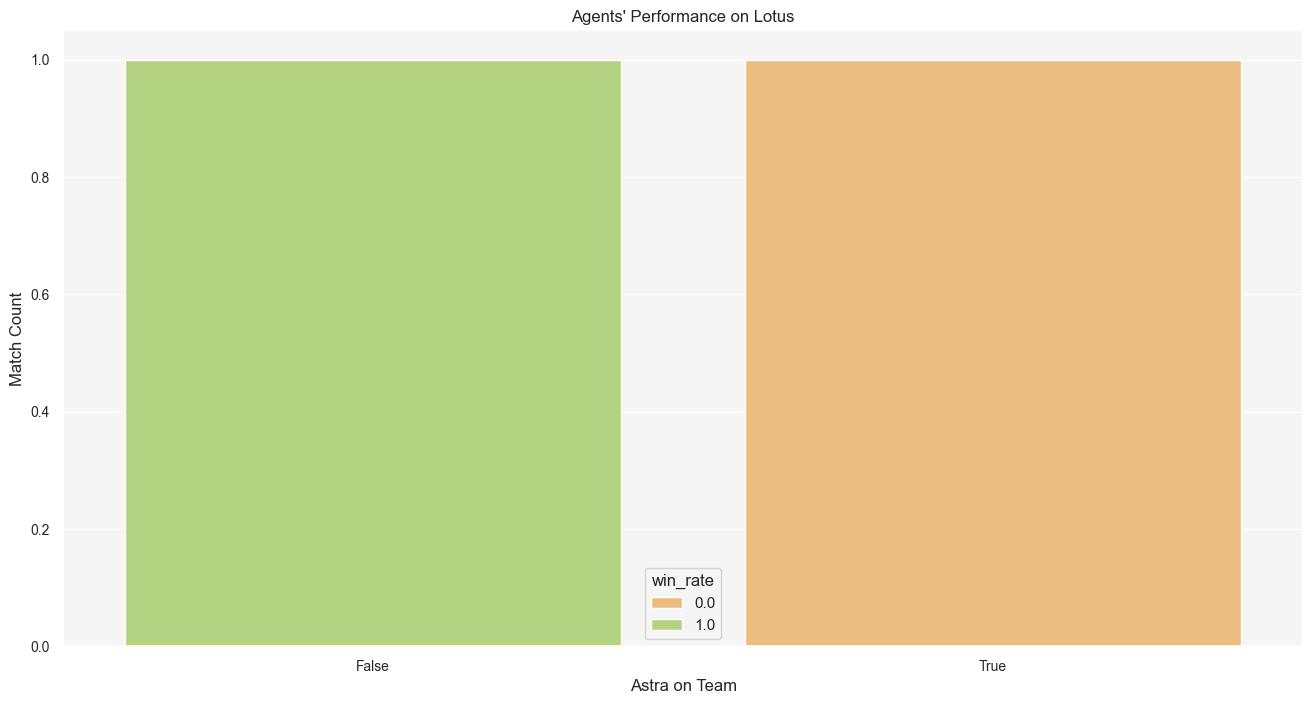

In [12]:
give_astra_correlation("lotus")

#### Haven

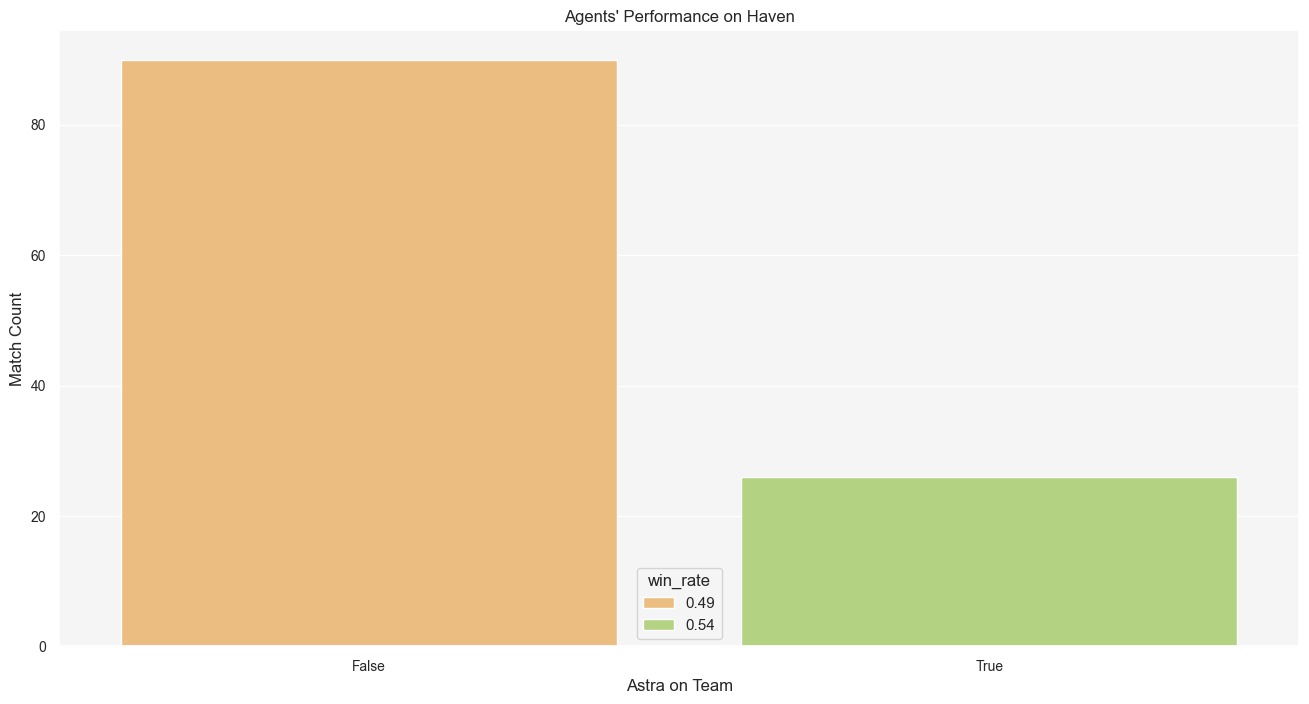

In [13]:
give_astra_correlation("haven")

#### Split

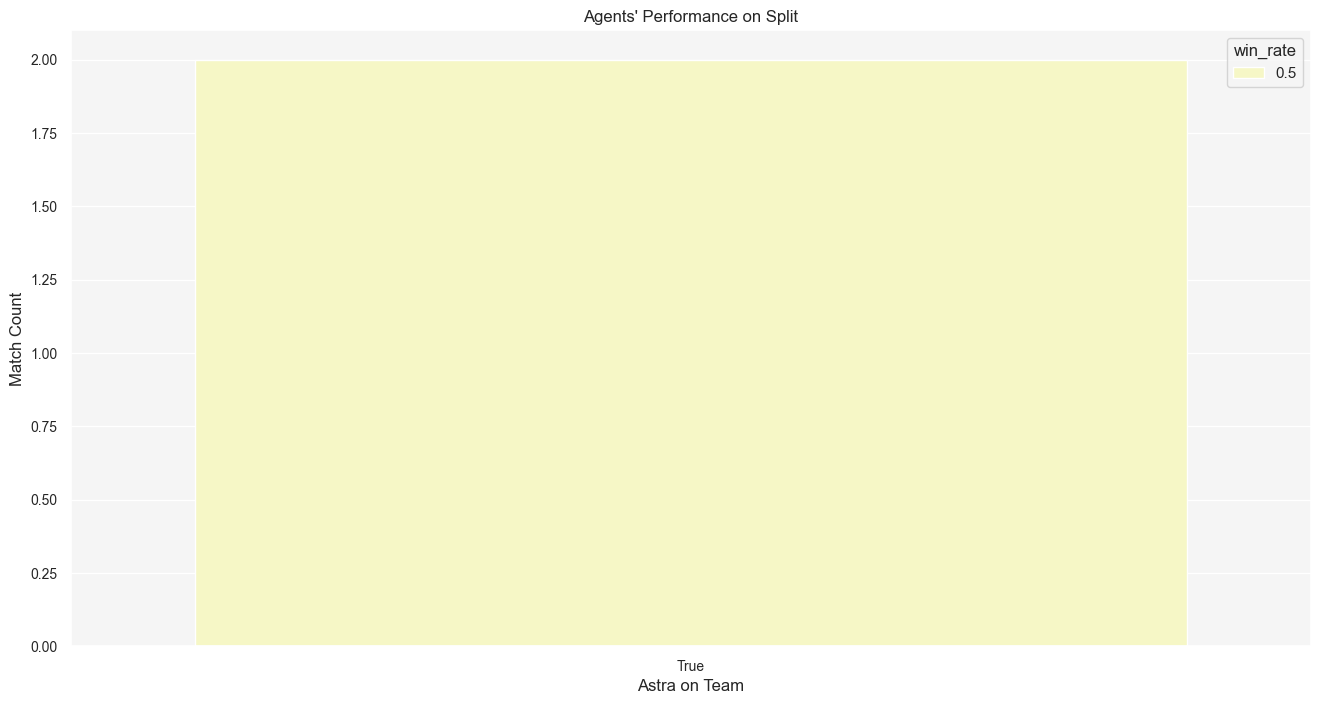

In [14]:
give_astra_correlation("split")

#### Icebox

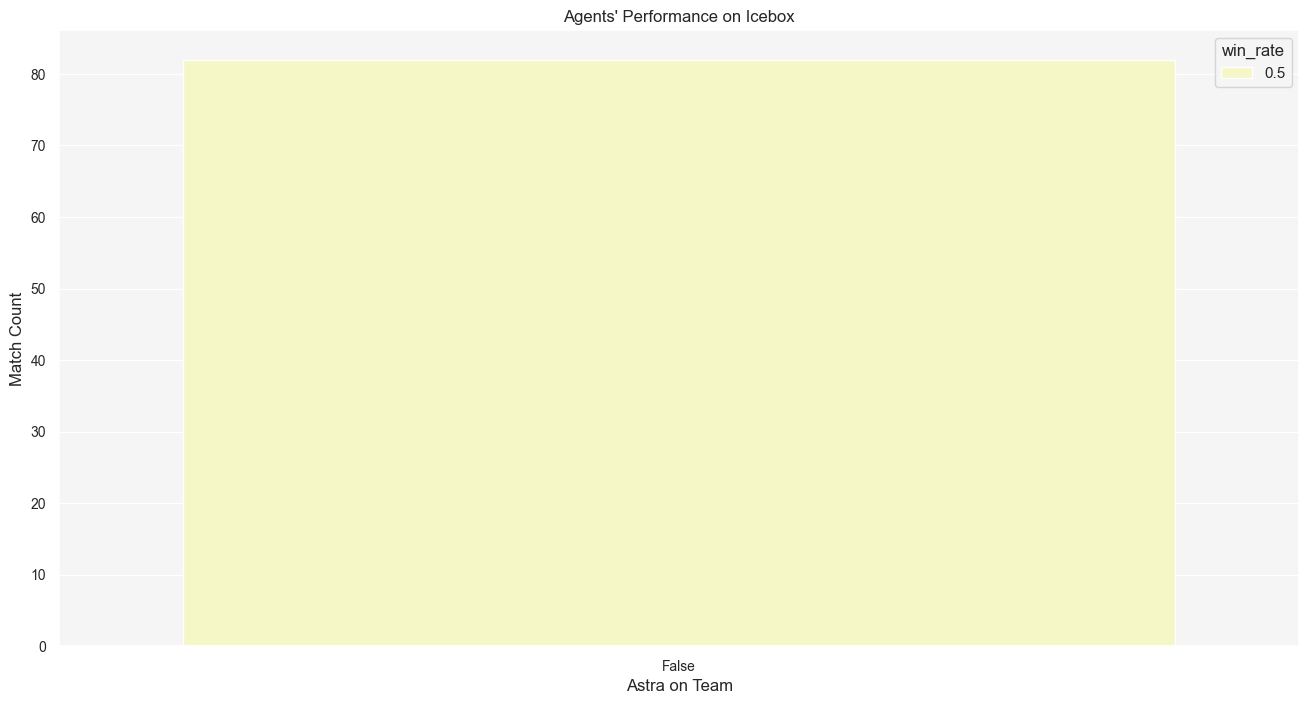

In [15]:
give_astra_correlation("icebox")

#### Breeze

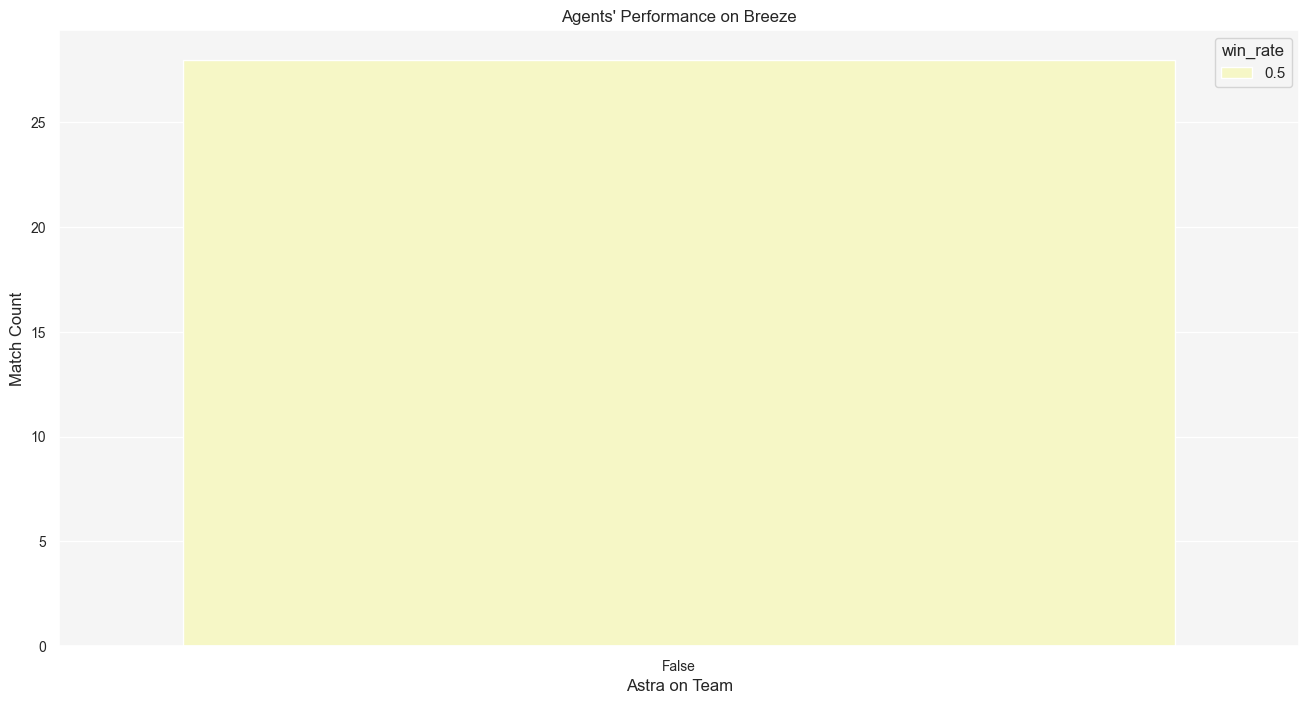

In [16]:
give_astra_correlation("breeze")

#### Pearl

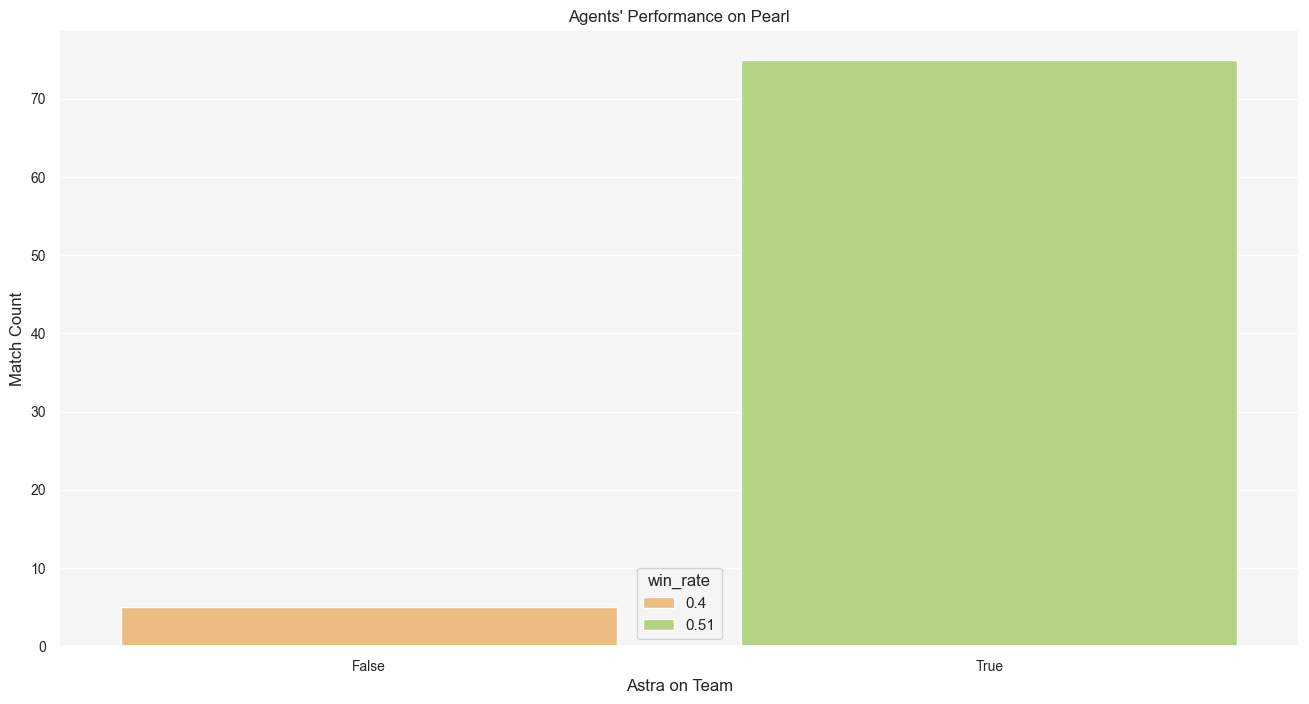

In [17]:
give_astra_correlation("pearl")